In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [56]:
def gender_plot_total(journal):
    authors = pd.read_csv(f"../author_data/gender/{journal}_authors_genderize.csv").drop(
        labels=['Unnamed: 0', 'PaperTitle', 'OnlineDate', 'JournalId', 'OriginalVenue', 'CreatedDate'], axis=1)
    editors = pd.read_csv( f"../editor_data/analysis/genderize/{journal}.genderize.aggregate.csv", 
                              names=["Editor", "Gender", "Probability"])
    
    author_eth_percentage = (authors['Gender'].value_counts() / len(authors))
    editor_eth_percentage = (editors['Gender'].value_counts() / len(editors))
    author_eth_percentage = author_eth_percentage['male']
    editor_eth_percentage = editor_eth_percentage['male']
    
    return {"author": float( '%.3f'%(author_eth_percentage)), 
            "editor": float( '%.3f'%(editor_eth_percentage))}

In [57]:
"""
returns percentage of authors and editors that are male as a dictionary
"""
def gender_plot_each_year(author_data, editor_names, editor_genders, year):
    authors = pd.read_csv(author_data).drop(labels=['Unnamed: 0', 'PaperTitle', 'OnlineDate', 'JournalId', 
                                                    'OriginalVenue', 'CreatedDate'], axis=1)
    editors = pd.read_csv(editor_names, names=["Editor", "Role", "x", "y", "z"])
    editor_genders = pd.read_csv(editor_genders, names=["Editor", "Gender", "Probability"])
    
    authors = authors[authors['Year'] == year]
    author_gender_percentage = -1
    if len(authors) > 0:
        author_genders = authors[authors['GenderProbability'] >= 0.90]
        author_gender_percentage = (author_genders['Gender'].value_counts() / len(author_genders))
        if 'male' in author_gender_percentage:
            author_gender_percentage = author_gender_percentage['male']
        else:
            author_gender_percentage = 0

    editors = editors.join(editor_genders.set_index('Editor'), on=['Editor'], how='left')
    editor_gender_percentage = -1
    if len(editors) > 0:
        editors = editors[editors['Probability'] >= 0.90]
        editor_gender_percentage = (editors['Gender'].value_counts() / len(editors))
        if 'male' in editor_gender_percentage:
            editor_gender_percentage = editor_gender_percentage['male']
        else:
            editor_gender_percentage = 0
        
    return {"author": float( '%.3f'%(author_gender_percentage)), 
            "editor": float( '%.3f'%(editor_gender_percentage))}

In [58]:
"""
returns percentage of authors and editors that are male (in year buckets) as a dictionary
"""
def gender_plot_buckets(author_data, editor_genders, journal, start, end, magic):
    authors = pd.read_csv(author_data).drop(labels=['Unnamed: 0', 'PaperTitle', 'OnlineDate', 'JournalId', 
                                                    'OriginalVenue', 'CreatedDate'], axis=1)
    editor_genders = pd.read_csv(editor_genders, names=["Editor", "Gender", "Probability"])
    
    bucket_authors = pd.DataFrame()
    for i in range(start, end+1):
        bucket_authors = pd.concat([bucket_authors, authors[authors['Year'] == i]])
    author_gender_percentage = -1
    if len(bucket_authors) > 0:
        author_genders = bucket_authors[bucket_authors['GenderProbability'] >= 0.90]
        author_gender_percentage = (author_genders['Gender'].value_counts() / len(author_genders))
        if 'male' in author_gender_percentage:
            author_gender_percentage = author_gender_percentage['male']
        else:
            author_gender_percentage = 0
            
    bucket_editors = pd.DataFrame()
    for j in range(start, end+1):
        k = j - magic
        editors = pd.read_csv(f"../editor_data/extracted_names/{journal}/{journal}.{k}.extracted.txt", 
                              names=["Editor", "Role", "x", "y", "z"])
        editors = editors.join(editor_genders.set_index('Editor'), on=['Editor'], how='left')
        bucket_editors = pd.concat([bucket_editors, editors])
    editor_gender_percentage = -1
    if len(bucket_editors) > 0:
        bucket_editors = bucket_editors[bucket_editors['Probability'] >= 0.90]
        editor_gender_percentage = (bucket_editors['Gender'].value_counts() / len(bucket_editors))
        if 'male' in editor_gender_percentage:
            editor_gender_percentage = editor_gender_percentage['male']
        else:
            editor_gender_percentage = 0
    
    return {"author": float( '%.3f'%(author_gender_percentage)), 
            "editor": float( '%.3f'%(editor_gender_percentage))}

In [59]:
def calculate_gender_average(author_data, editor_names, editor_genders, year):
    authors = pd.read_csv(author_data).drop(labels=['Unnamed: 0', 'PaperTitle', 'OnlineDate', 'JournalId', 
                                                    'OriginalVenue', 'CreatedDate'], axis=1)
    editors = pd.read_csv(editor_names, names=["Editor", "Role", "x", "y", "z"])
    editor_genders = pd.read_csv(editor_genders, names=["Editor", "Gender", "Probability"])
    
    authors = authors[authors['Year'] == year]
    author_res = 0
    if len(authors) > 0:
        author_genders = authors[authors['GenderProbability'] >= 0.90]
        author_gender_percentage = authors['Gender'].value_counts()
        if 'male' in author_gender_percentage:
            author_res = author_gender_percentage['male'] 

    editors = editors.join(editor_genders.set_index('Editor'), on=['Editor'], how='left')
    editor_res = 0
    if len(editors) > 0:
        editor_genders = editors[editors['Probability'] >= 0.90]
        editor_gender_percentage = editors['Gender'].value_counts()
        if 'male' in editor_gender_percentage:
            editor_res = editor_gender_percentage['male']
        
    return {"authorM": author_res, 
            "authortotal": len(authors),
            "editorM": editor_res,
            "editortotal": len(editors)
           }

In [60]:
"""
gets aggregate results across all available years for a journal
"""
def call_gender_plot_year(journal, start, end, magic):
    aggregate = {}
    for i in range(start, end+1):
#         res = gender_plot_each_year(f"../author_data/gender/{journal}_authors_genderize.csv", 
#                                     f"../editor_data/extracted_names/{journal}/{journal}.{i}.extracted.txt", 
#                                     f"../editor_data/analysis/genderize/{journal}.genderize.aggregate.csv", 
#                                     magic+i)
        res = calculate_gender_average(f"../author_data/gender/{journal}_authors_genderize.csv", 
                                    f"../editor_data/extracted_names/{journal}/{journal}.{i}.extracted.txt", 
                                    f"../editor_data/analysis/genderize/{journal}.genderize.aggregate.csv", 
                                    magic+i)
        aggregate[magic+i] = res
    return aggregate

In [61]:
def call_gender_plot_bucket(journal, start, end, magic):
    aggregate = {}
    cutoff = start + 4
    
    while cutoff <= end:
        res = gender_plot_buckets(f"../author_data/gender/{journal}_authors_genderize.csv",
                                  f"../editor_data/analysis/genderize/{journal}.genderize.aggregate.csv",
                                  journal, start, cutoff, magic)
        aggregate[f"{start}-{cutoff}"] = res
        start += 5
        cutoff += 5

    if start <= end:
        res = gender_plot_buckets(f"../author_data/gender/{journal}_authors_genderize.csv",
                                  f"../editor_data/analysis/genderize/{journal}.genderize.aggregate.csv",
                                  journal, start, end, magic)
        aggregate[f"{start}-{end}"] = res
    return aggregate

In [62]:
def calculate_overall(data):
    total_authorsM = 0
    total_editorsM = 0
    total_authors = 0
    total_editors = 0
    
    buckets = [1994, 1999, 2004, 2009, 2014, 2019]
    
    for journal in data:
        for year in sorted(journal.keys()):
            total_authorsM += journal[year]['authorM']
            total_authors += journal[year]['authortotal']
            total_editorsM += journal[year]['editorM']
            total_editors += journal[year]['editortotal']
            
    bucketed_authors = []
    bucketed_editors = []
    for i in range(len(buckets)):
        bucket_authorsM = 0
        bucket_authors = 0
        bucket_editorsM = 0
        bucket_editors = 0
        for journal in data:
            for j in range(5): #within this bucket
                bucket_authorsM += journal.get(buckets[i]+j, {}).get('authorM', 0)
                bucket_authors += journal.get(buckets[i]+j, {}).get('authortotal', 0)
                bucket_editorsM += journal.get(buckets[i]+j, {}).get('editorM', 0)
                bucket_editors += journal.get(buckets[i]+j, {}).get('editortotal', 0)
        bucketed_authors.append(bucket_authorsM/bucket_authors)
        bucketed_editors.append(bucket_editorsM/bucket_editors)
    
    return float(total_authorsM/total_authors), total_editorsM/total_editors, bucketed_authors, bucketed_editors

In [63]:
aer_gender = call_gender_plot_year("aer", 84, 113, 1910)
eco_gender = call_gender_plot_year("eco", 75, 91, 1932)
jpe_gender = call_gender_plot_year("jpe", 125, 131, 1892)
qje_gender = call_gender_plot_year("qje", 109, 138, 1885)
res_gender = call_gender_plot_year("res", 61, 90, 1933)

In [64]:
all_authors, all_editors, authors, editors = calculate_overall([aer_gender, eco_gender, jpe_gender, qje_gender, res_gender])

In [65]:
aer_buckets = call_gender_plot_bucket("aer", 1994, 2023, 1910)
eco_buckets = call_gender_plot_bucket("eco", 2007, 2023, 1932)
jpe_buckets = call_gender_plot_bucket("jpe", 2017, 2023, 1892)
qje_buckets = call_gender_plot_bucket("qje", 1994, 2023, 1885)
res_buckets = call_gender_plot_bucket("res", 1994, 2023, 1933)

In [66]:
1-all_authors

0.17615658362989328

In [67]:
1-all_editors

0.21125461254612543

In [89]:
def plot_gender(journal, data):
    total = gender_plot_total(journal)
    years = sorted(data.keys())
    total_authors = [1-total['author'] for _ in range(len(years))]
    total_editors = [1-total['editor'] for _ in range(len(years))]
    
    print(f"{journal} author average", total_authors)
    print(f"{journal} editor average", total_editors)
    authors = []
    editors = []
#     for year in years:
#         if data[year]['author'] == -1:
#             authors.append(0)
#         else:
#             authors.append(1-data[year]['author'])
#         if data[year]['editor'] == -1:
#             editors.append(0)
#         else:
#             editors.append(1-data[year]['editor'])
    
    axes = plt.axes()
    axes.set_ylim([0, 1])
    """
    both editor lines should be same color, average should be translucent dashed
    adjust line widths to be wider
    turn off top and right spines
    maybe a dashed line at 50%
    change y axis to percentages
    for 2x3 sixth square is legend
    """
    plt.plot(years, total_authors, label='total authors', color="#f34d4d", linestyle='dashed', alpha=0.5, lw=2)
    plt.plot(years, total_editors, label='total editors', color="#69bade", linestyle='dashed', alpha=0.5, lw=2)
    plt.plot(years, authors, label='authors', color="#f34d4d", lw=2.5)
    plt.plot(years, editors, label='editors', color="#69bade", lw=2.5)
    plt.title(f'Percentage of Female Contributors at {journal.upper()}')
    plt.xticks(years, rotation=15)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.spines[['right', 'top']].set_visible(False)
#     plt.legend()
#     plt.savefig(f'../graphs/{journal}_gender.png')
    plt.show()

In [91]:
def plot_gender_aggregate(authors, editors, all_authors, all_editors, years):
    total_authors = [1-all_authors for _ in range(len(years))]
    total_editors = [1-all_editors for _ in range(len(years))]
    
    authors_plot = [0 for _ in range(len(authors))]
    editors_plot = [0 for _ in range(len(editors))]
    for i in range(len(years)):
        authors_plot[i] = 1-authors[i]
        editors_plot[i] = 1-editors[i]
    
    axes = plt.axes()
    axes.set_ylim([0, 1])
    plt.rcParams["figure.figsize"] = [6.5, 6]
    plt.rcParams["figure.autolayout"] = True
    plt.plot(years, total_authors, label='total authors', color="#f34d4d", linestyle='dashed', alpha=0.5, lw=2)
    plt.plot(years, total_editors, label='total editors', color="#69bade", linestyle='dashed', alpha=0.5, lw=2)
    plt.plot(years, authors_plot, label='authors', color="#f34d4d", lw=2.5)
    plt.plot(years, editors_plot, label='editors', color="#69bade", lw=2.5)
    plt.title(f'Percentage of Female Contributors Across the "Top Five"')
    plt.xticks(years, rotation=15)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    ax.spines[['right', 'top']].set_visible(False)
    plt.legend()
#     plt.savefig(f'../graphs/aggregate_gender.png')
    plt.show()

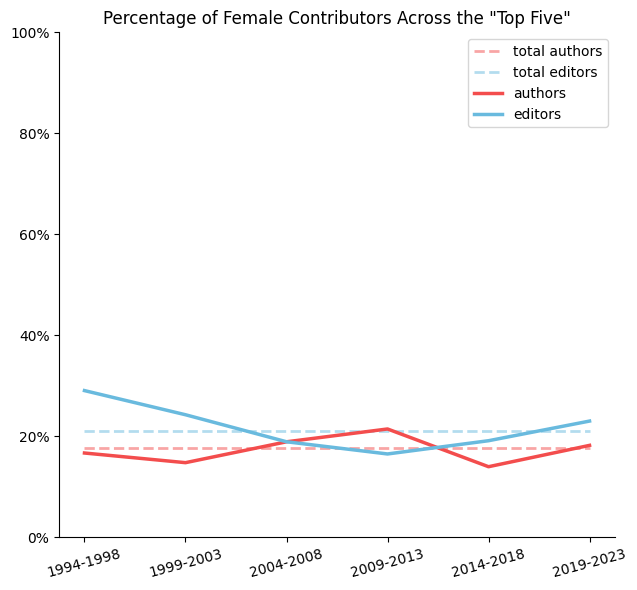

In [92]:
plot_gender_aggregate(authors, editors, all_authors, all_editors, 
                         ['1994-1998', '1999-2003', '2004-2008', '2009-2013', '2014-2018', '2019-2023'])

aer author average [0.18700000000000006, 0.18700000000000006, 0.18700000000000006, 0.18700000000000006, 0.18700000000000006, 0.18700000000000006]
aer editor average [0.23399999999999999, 0.23399999999999999, 0.23399999999999999, 0.23399999999999999, 0.23399999999999999, 0.23399999999999999]


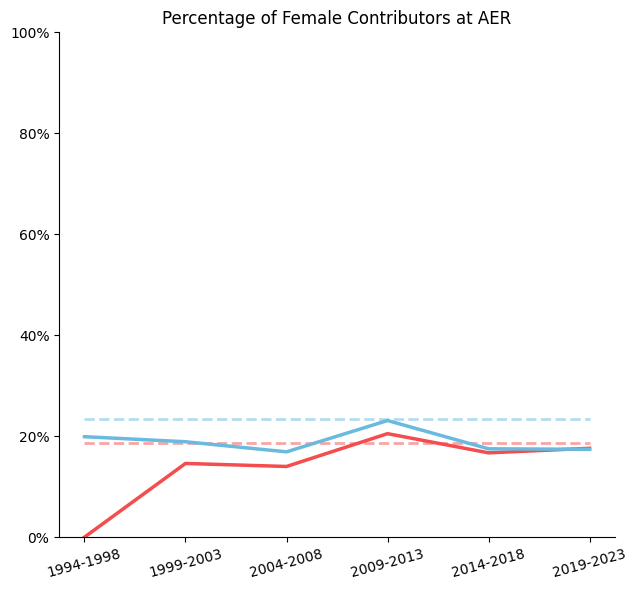

In [84]:
"""
bucketized
"""
plot_gender("aer", aer_buckets)

eco author average [0.16200000000000003, 0.16200000000000003, 0.16200000000000003, 0.16200000000000003]
eco editor average [0.17500000000000004, 0.17500000000000004, 0.17500000000000004, 0.17500000000000004]


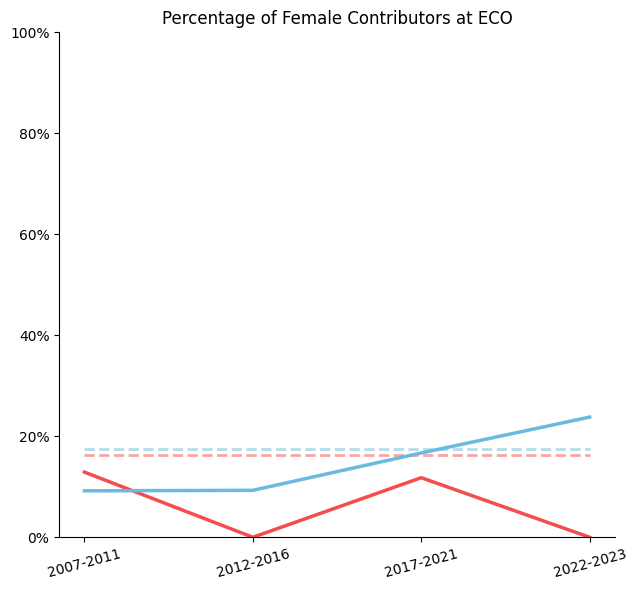

In [85]:
plot_gender("eco", eco_buckets)

jpe author average [0.18700000000000006, 0.18700000000000006, 0.18700000000000006, 0.18700000000000006, 0.18700000000000006, 0.18700000000000006, 0.18700000000000006]
jpe editor average [0.259, 0.259, 0.259, 0.259, 0.259, 0.259, 0.259]


ValueError: x and y must have same first dimension, but have shapes (7,) and (0,)

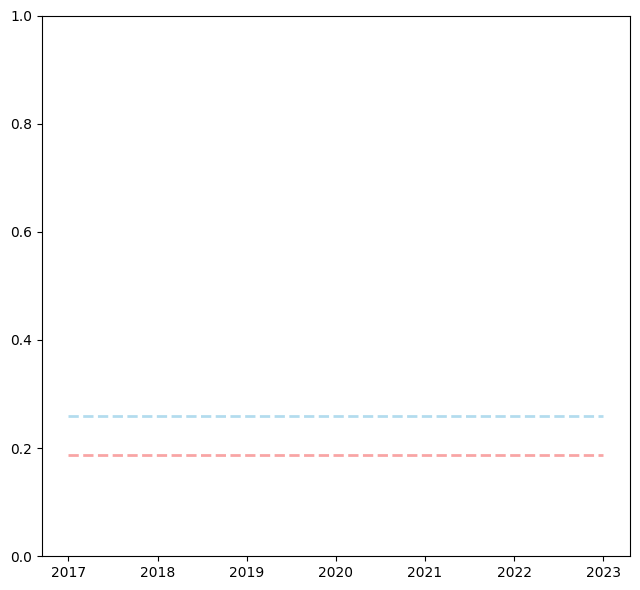

In [90]:
# modify so each journal has six buckets
plot_gender("jpe", jpe_gender)

qje author average [0.20899999999999996, 0.20899999999999996, 0.20899999999999996, 0.20899999999999996, 0.20899999999999996, 0.20899999999999996]
qje editor average [0.15600000000000003, 0.15600000000000003, 0.15600000000000003, 0.15600000000000003, 0.15600000000000003, 0.15600000000000003]


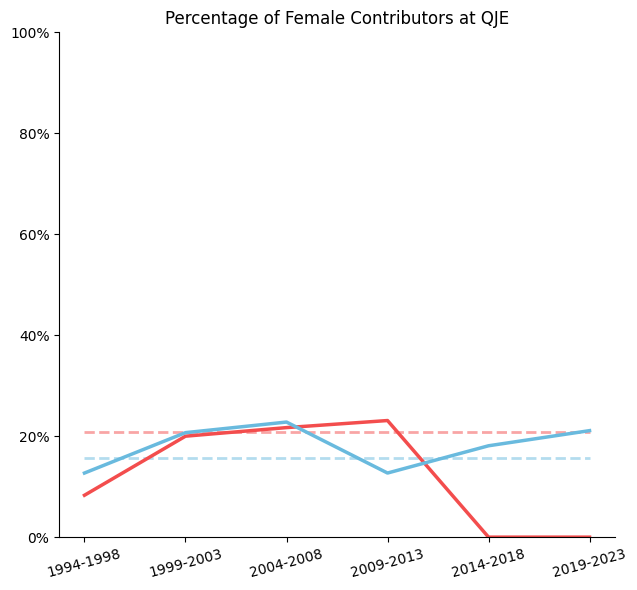

In [86]:
plot_gender("qje", qje_buckets)

res author average [0.18000000000000005, 0.18000000000000005, 0.18000000000000005, 0.18000000000000005, 0.18000000000000005, 0.18000000000000005]
res editor average [0.29100000000000004, 0.29100000000000004, 0.29100000000000004, 0.29100000000000004, 0.29100000000000004, 0.29100000000000004]


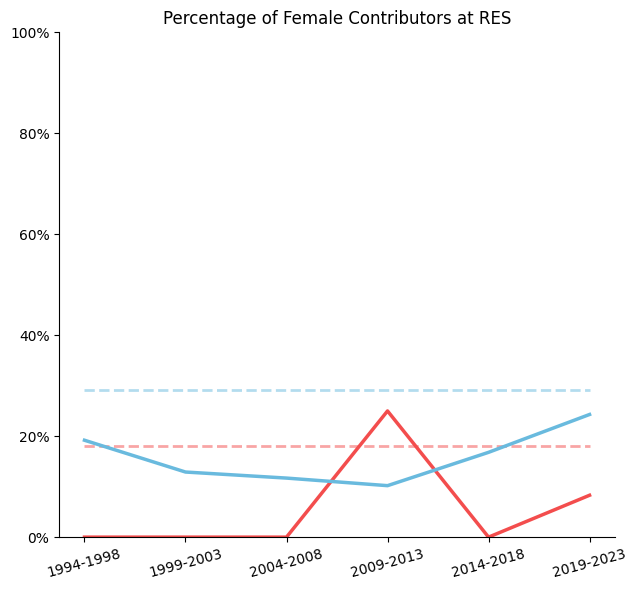

In [87]:
plot_gender("res", res_buckets)